# Baseball Case Study


Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics 

In [163]:
#Importing the requird libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [164]:
# importing the dataset
df=pd.read_csv('baseball.csv')

In [165]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


## EDA

In [166]:
# finding out the total number of rows and  columns in the data set
df.shape

#The output shows that there are 30 rows and 17 columns (including te target variable)

(30, 17)

In [167]:
#Finding out the types of the varibles 
df.dtypes

# Theoutput shows that all the variables are neumerical in nature (i.e. either integer or float)
#Categorical data is not present in the data set

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [168]:
# Information about the column names
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [169]:
# finding out the data types and null values in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [170]:
# Finding the null values in the data set
df.isnull().sum()

# The output shows that there are no null values in the dataset.

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

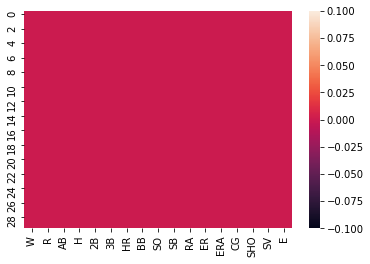

In [171]:
# Null values detection with the help of heatmap

sns.heatmap(df.isnull())

# The output shows the same result as the previous one ---no null valus

#### Summary Statistics

In [172]:
df=pd.DataFrame(data=df)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [173]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [174]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

<AxesSubplot:xlabel='R', ylabel='Density'>

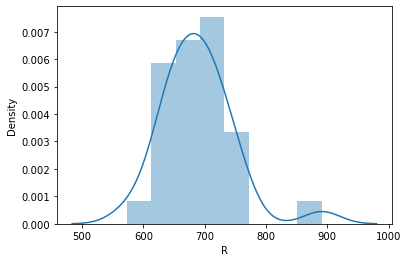

In [175]:
sns.distplot(df['R'])

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

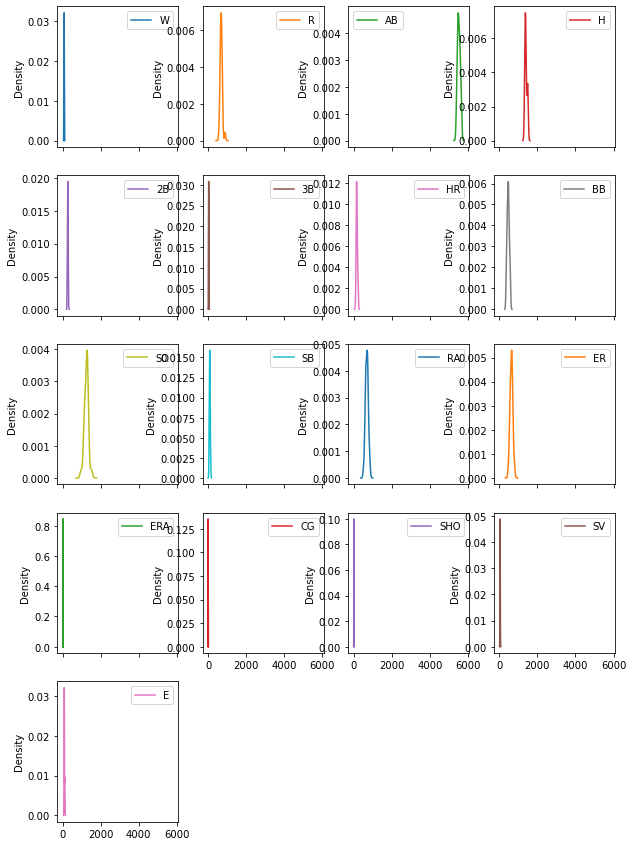

In [176]:
df.plot(kind='kde',subplots=True,layout=(5,4),figsize=(10,15))  # kde= kernel density estimation

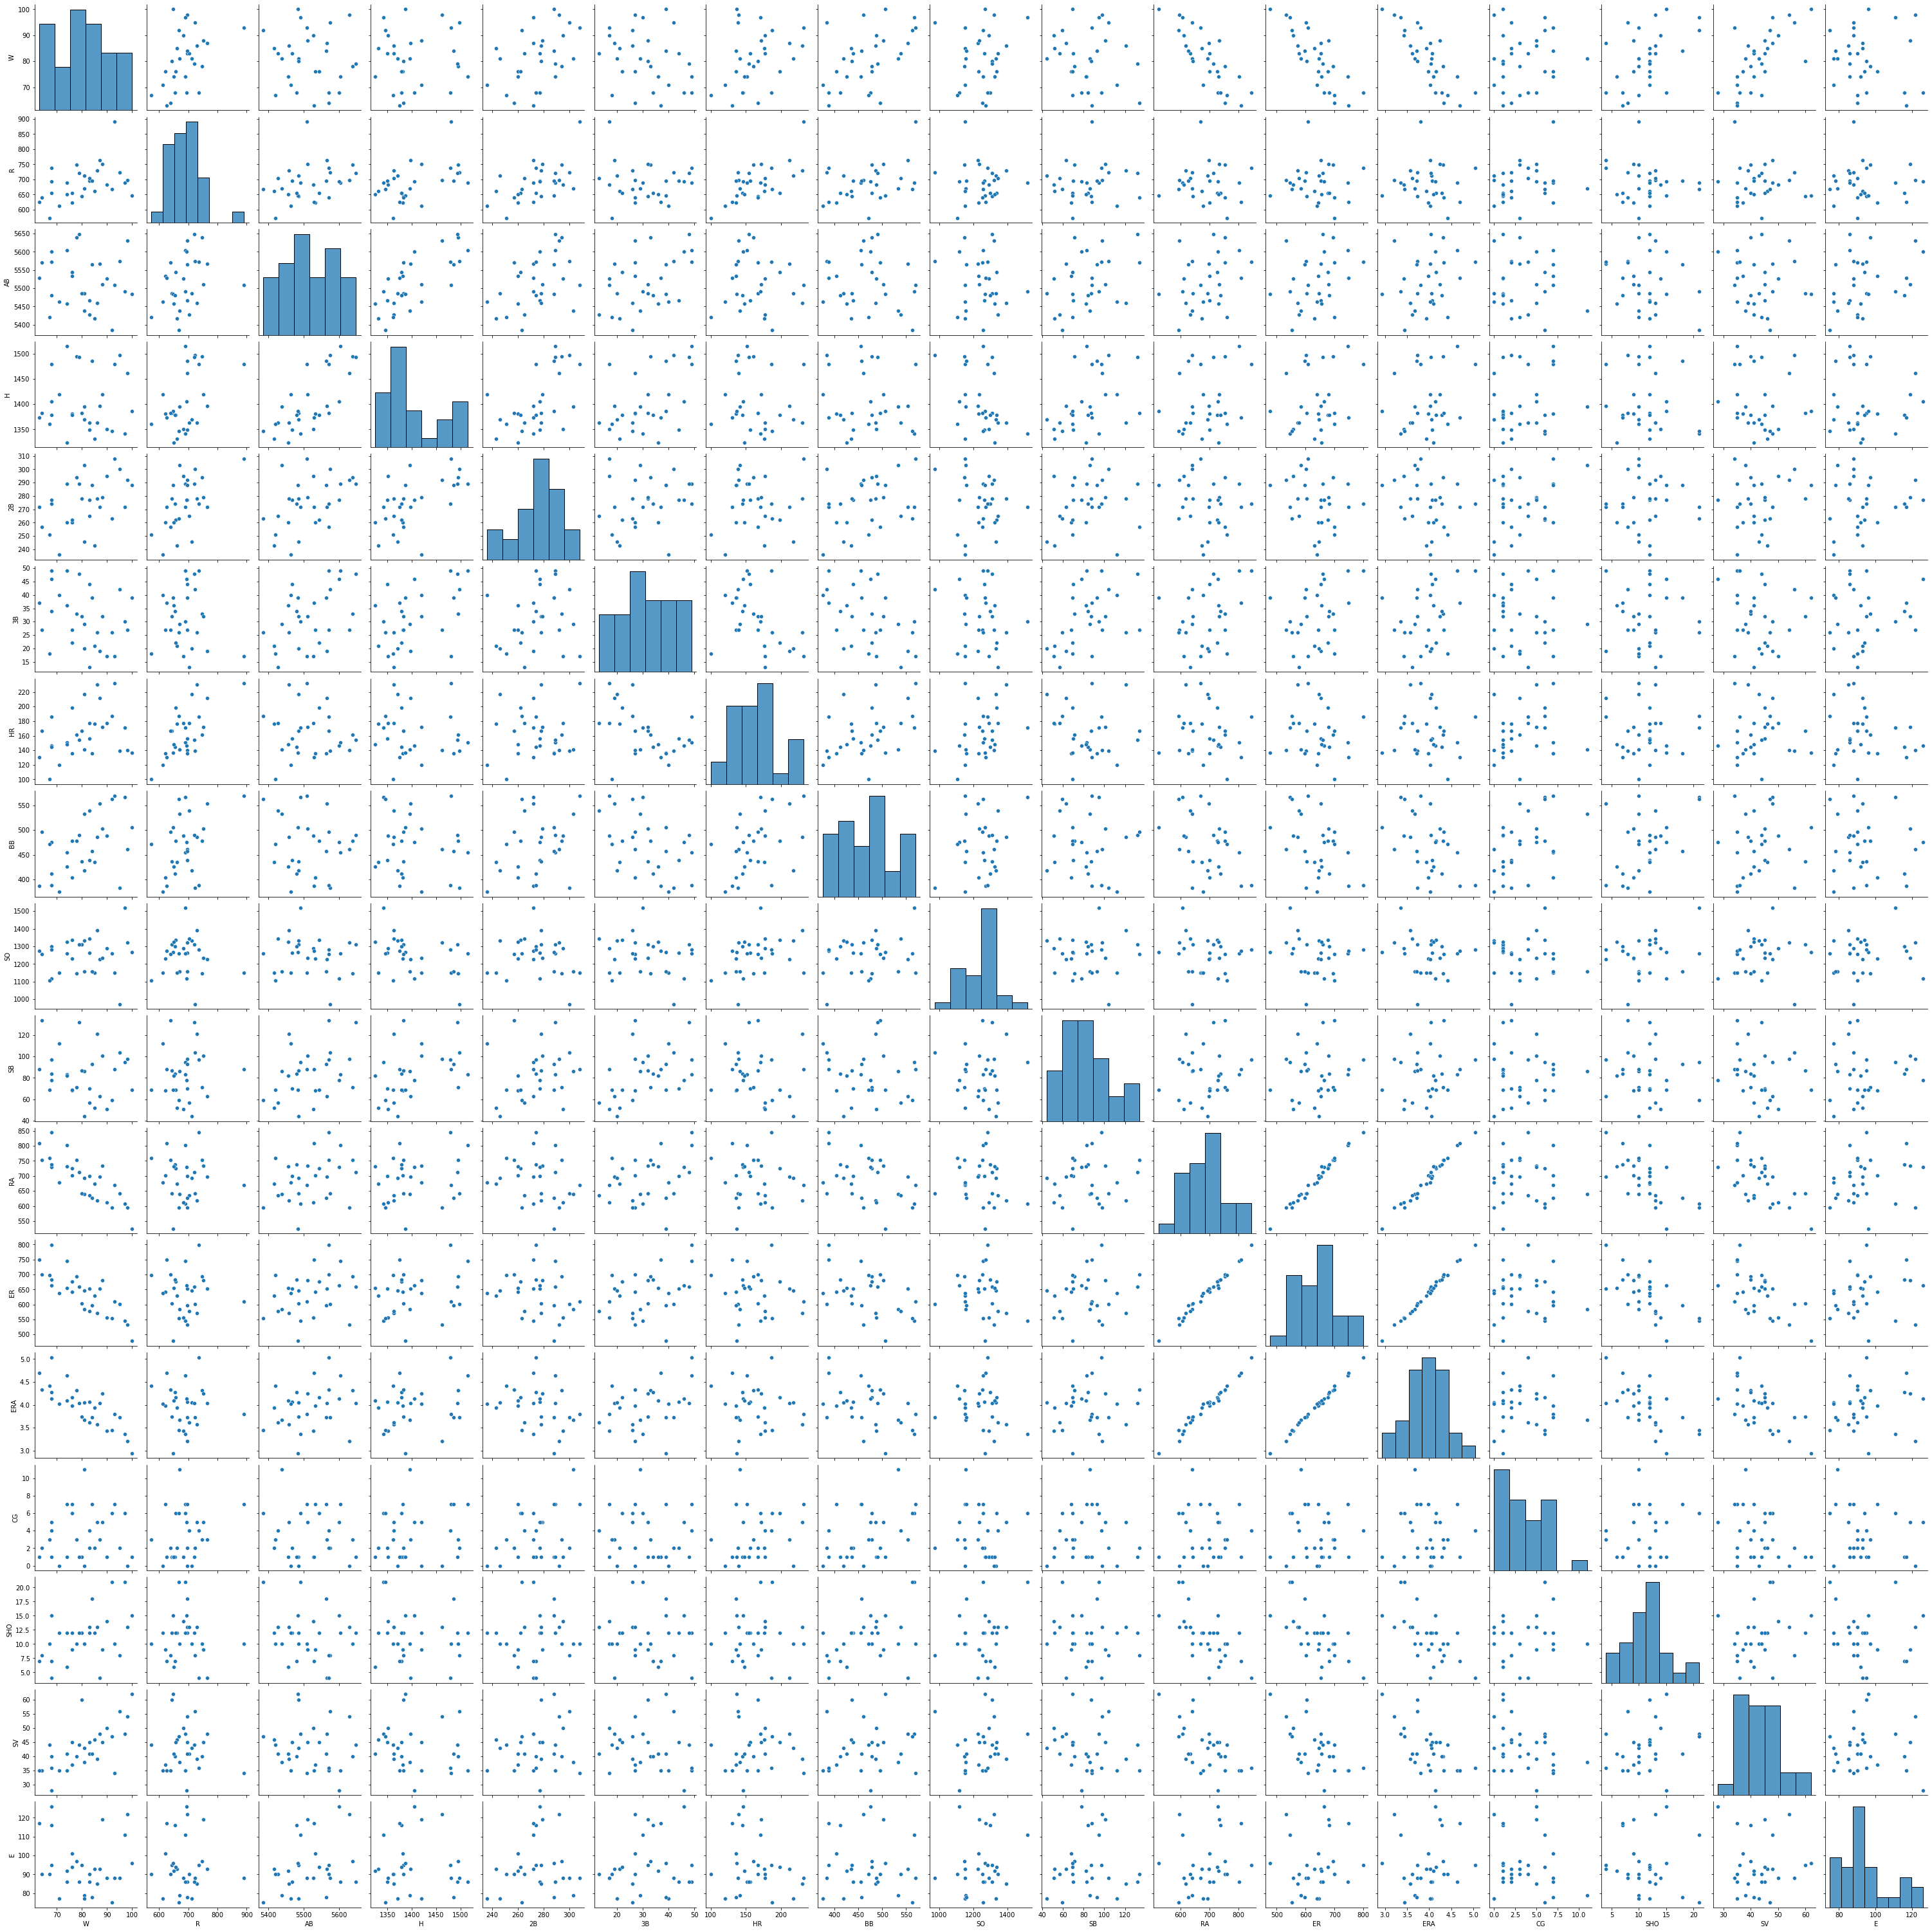

In [177]:
sns.pairplot(df)

W         AxesSubplot(0.125,0.657941;0.110714x0.222059)
R      AxesSubplot(0.257857,0.657941;0.110714x0.222059)
AB     AxesSubplot(0.390714,0.657941;0.110714x0.222059)
H      AxesSubplot(0.523571,0.657941;0.110714x0.222059)
2B     AxesSubplot(0.656429,0.657941;0.110714x0.222059)
3B     AxesSubplot(0.789286,0.657941;0.110714x0.222059)
HR        AxesSubplot(0.125,0.391471;0.110714x0.222059)
BB     AxesSubplot(0.257857,0.391471;0.110714x0.222059)
SO     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
SB     AxesSubplot(0.523571,0.391471;0.110714x0.222059)
RA     AxesSubplot(0.656429,0.391471;0.110714x0.222059)
ER     AxesSubplot(0.789286,0.391471;0.110714x0.222059)
ERA          AxesSubplot(0.125,0.125;0.110714x0.222059)
CG        AxesSubplot(0.257857,0.125;0.110714x0.222059)
SHO       AxesSubplot(0.390714,0.125;0.110714x0.222059)
SV        AxesSubplot(0.523571,0.125;0.110714x0.222059)
E         AxesSubplot(0.656429,0.125;0.110714x0.222059)
dtype: object

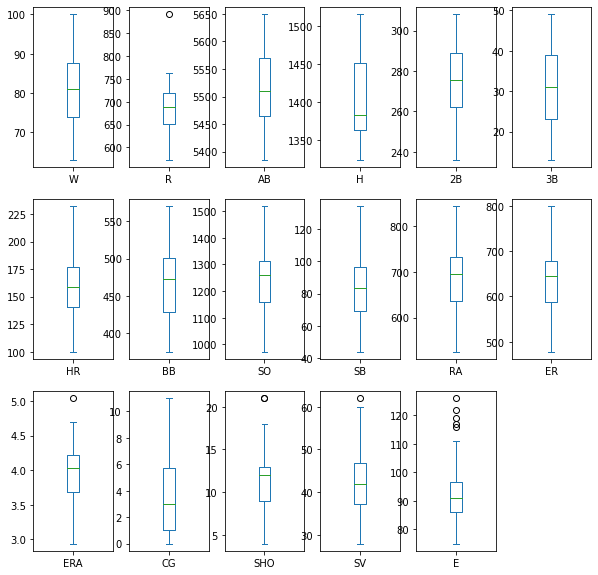

In [178]:
# finding the outliers in the data set


df.plot(kind='box',subplots=True,layout=(3,6),figsize=(10,10))

In [179]:
# Finding out the correlation among the various variables.
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

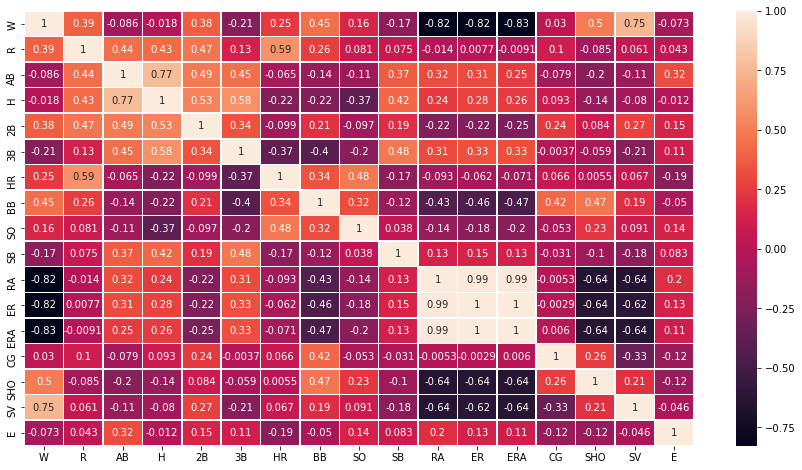

In [186]:
#Finding out eh correlation with the help of heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)

# Data Cleaning

#### Removing Outliers

In [181]:
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [182]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape',dfnew.shape)

dfnew.shape (29, 17)


In [183]:
df=dfnew

<AxesSubplot:>

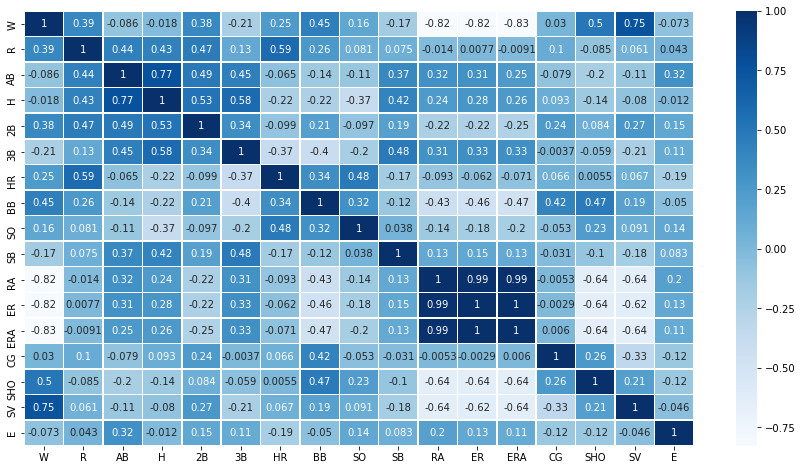

In [184]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True,linewidths=.5)

After removing the outliers there is no effect on the correlation of different variable.

In [244]:
# Removing Skewness

df['R']=np.sqrt(df['R'])
df.skew()

W      0.119013
R     -0.300697
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

<AxesSubplot:xlabel='R', ylabel='Density'>

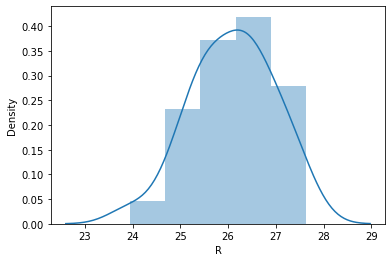

In [248]:
sns.distplot(df['R'])

### Splitting the data set into two parts (predictor variables (x) and target variable(y))

In [275]:
x=df.iloc[:,1:]
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,26.907248,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,26.381812,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,25.865034,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,24.939928,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,26.248809,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,27.640550,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,26.702060,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,25.377155,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,27.349589,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,27.404379,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [276]:
x.shape

(29, 16)

In [277]:
y=df.iloc[:,0:1]
y

,W
0,95
1,83
2,81
3,76
4,74
6,87
7,81
8,80
9,78
10,88


In [278]:
y.shape

(29, 1)

In [279]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [280]:
def var_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [281]:
var_calc()

      VIF Factor features
0    6722.949369        R
1    5034.951776       AB
2    3946.337018        H
3     855.823108       2B
4      35.729517       3B
5     265.041572       HR
6     257.968384       BB
7     392.674567       SO
8      28.650890       SB
9   18051.532494       RA
10  59195.789740       ER
11  28794.573724      ERA
12      5.954298       CG
13     30.408282      SHO
14    115.094483       SV
15     88.418842        E


Though The Variance_inflation_factor of the few variables is high yet we cannot  remove them as they have high correlation with the target variable.

### Normalizing the Data

In [253]:
from sklearn.preprocessing import StandardScaler

In [282]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.95651645,  0.83008422,  1.73830631,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.50148589, -0.81326172,  1.64315663,
        -0.47109143],
       [ 0.34416795, -0.70283074, -0.93869788,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.50148589,  0.15929869,  0.21100645,
        -0.61489829],
       [-0.25808975, -1.10025314, -0.10665604,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  2.85461197, -0.32698152, -0.70036184,
        -1.1182223 ],
       [-1.33621796,  0.23395062, -0.35988616, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.36301292, -0.57012162, -0.83055731,
         0.46365315],
       [ 0.18916563,  1.25589393,  2

### Splitting the predictor variables and target variable into training and testing 

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=45)

In [285]:
xtrain.shape

(20, 16)

In [286]:
ytrain.shape

(20, 1)

In [287]:
xtest.shape

(9, 16)

In [288]:
ytest.shape

(9, 1)

### Fitting the Model

In [261]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_

array([[ 2.34572838e+00, -2.34721857e+00,  7.52440146e-01,
         4.91996764e-02,  2.73703715e+00,  4.73175617e+00,
        -2.72969804e+00, -3.49221036e+00, -1.45725629e-02,
         2.25861431e+01, -6.93824142e+00, -2.27148648e+01,
         8.73523817e-01,  4.56465115e+00,  2.17237921e+00,
         1.57682388e+00]])

In [295]:
lr.intercept_

array([80.85936407])

In [296]:
lr.score(xtrain,ytrain)

0.989132442224808

In [297]:
pred=lr.predict(xtest)
pred

array([[80.28030231],
       [84.61285707],
       [96.63344479],
       [63.04903795],
       [75.31714897],
       [82.20418551],
       [60.38028241],
       [92.41115909],
       [89.03314008]])

In [300]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,80.280302
1,84.612857
2,96.633445
3,63.049038
4,75.317149
5,82.204186
6,60.380282
7,92.411159
8,89.033140


In [301]:
lr.score(xtest,ytest)

-0.024155009983098275

## Regularization

In [314]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

from sklearn.metrics import r2_score

In [315]:
rdg=Ridge(alpha=0.0001, random_state=45)
rdg.fit(xtrain,ytrain)
rdg.score(xtrain,ytrain)

0.9891322371362039

In [321]:
predict=rdg.predict(xtest)

In [322]:
r2_score(ytest,predict)

-0.018588410844224246

In [323]:
lso=Lasso(alpha=.0001,random_state=47)
lso.fit(xtrain,ytrain)
lso.score(xtrain,ytrain)

0.9885281750135793

In [324]:
predict1=lso.predict(xtest)

In [325]:
r2_score(ytest,predict1)

0.068903458009825

### Approaching more Regressors

In [264]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [265]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
print('dtc score:',dtr.score(xtrain,ytrain))

dtrpredict=dtr.predict(xtest)
print('dtc r2_score:', r2_score(ytest,dtrpredict))

print("Mean squared error of dtc = ", mean_squared_error(ytest,dtrpredict))
print("RootMean squared errorofdtc= ",np.sqrt(mean_squared_error(ytest,dtrpredict)))

dtc score: 1.0
dtc r2_score: 0.08048708048708042
Mean squared error of dtc =  76.44444444444444
RootMean squared errorofdtc=  8.743251365736


In [266]:
knr=KNeighborsRegressor()
knr.fit(xtrain,ytrain)
print('knr score:',knr.score(xtrain,ytrain))

knrpredict=knr.predict(xtest)
print('knr r2_score:',r2_score(ytest,knrpredict))

print("Mean squareed error of knr =",mean_squared_error(ytest,knrpredict))
print("Root Mean squared error of knr=",np.sqrt(mean_squared_error(ytest,knrpredict)))

knr score: 0.8337701501141932
knr r2_score: 0.5073121473121472
Mean squareed error of knr = 40.96000000000001
Root Mean squared error of knr= 6.4


In [267]:
svr1=SVR()
svr1.fit(xtrain,ytrain)
print('svr score:', svr1.score(xtrain,ytrain))

svr1predict=svr1.predict(xtest)
print('svr r2_score:',r2_score(ytest,svr1predict))

print("Mean squared error of svr = ",mean_squared_error(ytest,svr1predict))
print("Root Mean squared error of svr = ", np.sqrt(mean_squared_error(ytest,svr1predict)))

svr score: 0.2607221619402692
svr r2_score: 0.1128701398661267
Mean squared error of svr =  73.75225281656176
Root Mean squared error of svr =  8.587913181708451


In [268]:
from sklearn.linear_model import SGDRegressor

sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
print('sgd score:',sgd.score(xtrain,ytrain))

sgd1predict=sgd.predict(xtest)
print('sgd r2_score:', r2_score(ytest,sgd1predict))

print("Mean squared error of sgd=",mean_squared_error(ytest,sgd1predict))
print("Root Mean squared error of sgd=",np.sqrt(mean_squared_error(ytest,sgd1predict)))

sgd score: 0.9697428950422513
sgd r2_score: 0.7256157223286124
Mean squared error of sgd= 22.811157109124988
Root Mean squared error of sgd= 4.776102711324892


### From the above model fitting,  the score of "DEcision Tree Regressor is best i.e=1.0 and r2_score is also least, hence saving the best fit Model.

# Saving the best model

In [269]:
import joblib

joblib.dump(dtr,'dtrmodel.obj')

dtrloadmodel=joblib.load('dtrmodel.obj')
dtrloadmodel.predict(xtest)

array([ 83.,  97., 100.,  78.,  90.,  78.,  68.,  83.,  78.])